# Project : Titanic Survival Prediction

**Objective:** Build a model that predicts whether a passenger on the Titanic survived or not.

Dataset consists of 418 rows and 12 columns.

We have to predict whether passenger survived or not based on the following parameters:
1. Passanger ID : Unique ID of every passenger.
2. Passanger class : The passenger aboard in Titanic categarized into 3 class. First, Second and third class.
3. Gender : Whether passenger is Male or Female.
4. Age : Age of every passenger.

**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Load Data**

In [2]:
# importing the dataset
df = pd.read_csv(r"D:\Internship\CodSoft\Project 1\archive\tested.csv")

In [3]:
df.head()  # Extract first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.columns  # to see all the columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.shape   # checking the total rows and columns in the dataset

(418, 12)

In [6]:
df.describe()  # to see the statistical values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df.info()  # checking the info of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


The dataset consists of 418 records and 12 columns.
The columns represent the follwing variables:
1. Passenger ID: Unique ID of passenger.
2. Survived: It includes 0 and 1. 0 indicates that passenger is not survived and 1 indicates passenger is survived.
3. Pclass: Class of passenger. It includes "cLass 1", "class 2", "class 3".
4. Name: Name of passenger.
5. Sex: Weither passenger is male or female.
6. Age: Age of passenger.
7. SibSp: Number of Sibling/spouse of every passenger.
8. Parch: Number of Parents/children of every passenger.
9. Ticket: Ticket number.
10. Fare: Fare of ticket.
11. Cabin: Cabin number.
12. Embarked: Where the traveler mounted from.

In [8]:
df.isnull().sum()   # checking the total null values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are null values in following columns:
1. Age
2. Cabin

1. In age column we replace null values with age.
2. We will drop the "cabin" column.

In [9]:
df.drop(["Cabin"], axis = 1, inplace = True)  # drop the column

In [10]:
# Replacing null values with mean

df["Age"].fillna(df["Age"].mean(), inplace = True)   
df["Fare"].fillna(df["Fare"].mean(), inplace = True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


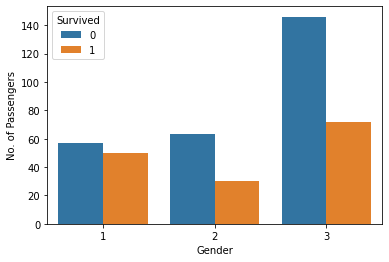

In [13]:
sns.countplot("Pclass" ,hue = "Survived", data = df)
plt.xlabel("Gender")
plt.ylabel("No. of Passengers")
plt.show()

We can see that the 3rd class passenger are in the majority who doesn't able to survive.

In [14]:
df["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [15]:
df["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])

In [17]:
df["Sex"].value_counts()

1    266
0    152
Name: Sex, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Embarked"] = le.fit_transform(df["Embarked"])

In [19]:
df["Embarked"].value_counts()

2    270
0    102
1     46
Name: Embarked, dtype: int64

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2


In [21]:
df1 = df[["PassengerId", "Pclass", "Sex", "Age", "Survived"]]
df1.head()

,PassengerId,Pclass,Sex,Age,Survived
0,892,3,1,34.5,0
1,893,3,0,47.0,1
2,894,2,1,62.0,0
3,895,3,1,27.0,0
4,896,3,0,22.0,1


In [22]:
x = df1.iloc[:, :-1].values  # independent variable
y = df1.iloc[:, -1].values   # dependent variable

In [23]:
print(x)

[[8.92000000e+02 3.00000000e+00 1.00000000e+00 3.45000000e+01]
 [8.93000000e+02 3.00000000e+00 0.00000000e+00 4.70000000e+01]
 [8.94000000e+02 2.00000000e+00 1.00000000e+00 6.20000000e+01]
 ...
 [1.30700000e+03 3.00000000e+00 1.00000000e+00 3.85000000e+01]
 [1.30800000e+03 3.00000000e+00 1.00000000e+00 3.02725904e+01]
 [1.30900000e+03 3.00000000e+00 1.00000000e+00 3.02725904e+01]]


In [24]:
print(y)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [25]:
# splitting into training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.70, random_state = 10)

In [26]:
# Applying logistic regression model

from sklearn.linear_model import LogisticRegression  
regressor = LogisticRegression()
regressor.fit(x_train, y_train)

LogisticRegression()

In [27]:
# checking if passenger surivived or not based on their id, class, gender, and age

print("For Values of Gender \n 0 indicates female \n 1 indicates male")
a = input("Enter the Passenger Id : ")
b = input("Enter the Passenger Class : ")
c = input("Enter the Gender : ")
d = input("Enter the Age : ")
y_pred = regressor.predict([[a, b, c, d]])
if(y_pred == 0):
    print("Passenger is not survived")
else:
    print("Passenger is survived")

For Values of Gender 
 0 indicates female 
 1 indicates male
Enter the Passenger Id : 894
Enter the Passenger Class : 0
Enter the Gender : 1
Enter the Age : 21
Passenger is not survived
